In [1]:
import pandas as pd
import numpy as np
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the Dataset
data = pd.read_csv('Retail_Transaction_Dataset.csv')
data

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,1/21/2022 6:27,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,3/1/2023 13:01,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,3/21/2024 15:37,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,10/31/2020 9:59,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,12/10/2020 0:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1000999995,3/27/2023 6:12,Lisa Gonzalez,"['Pickles', 'Carrots', 'Peanut Butter', 'Spong...",1,22.07,Debit Card,Los Angeles,Supermarket,False,Middle-Aged,Winter,NaN
999996,1000999996,5/19/2022 5:13,Emily Graham,['Cereal'],8,80.25,Cash,Houston,Warehouse Club,True,Senior Citizen,Spring,Discount on Selected Items
999997,1000999997,9/3/2021 13:59,Cynthia Anderson,['Trash Bags'],3,60.74,Credit Card,Los Angeles,Convenience Store,False,Homemaker,Winter,NaN
999998,1000999998,10/17/2023 5:50,Michael Rodriguez,"['Diapers', 'Coffee', 'Coffee', 'Mop']",3,23.48,Debit Card,San Francisco,Supermarket,True,Retiree,Winter,BOGO (Buy One Get One)


In [3]:
# Convert the 'Date' column from string to datetime format
data['Date'] = pd.to_datetime(data['Date'])
data['Date']

0        2022-01-21 06:27:00
1        2023-03-01 13:01:00
2        2024-03-21 15:37:00
3        2020-10-31 09:59:00
4        2020-12-10 00:59:00
                 ...        
999995   2023-03-27 06:12:00
999996   2022-05-19 05:13:00
999997   2021-09-03 13:59:00
999998   2023-10-17 05:50:00
999999   2020-06-15 11:58:00
Name: Date, Length: 1000000, dtype: datetime64[ns]

In [4]:
# Extract new features from 'date_time'
data['hour'] = data['Date'].dt.hour
data['day_of_week'] = data['Date'].dt.dayofweek
data['month'] = data['Date'].dt.month

In [5]:
# Display the first few rows with the new features
print(data['Date'].head())

0   2022-01-21 06:27:00
1   2023-03-01 13:01:00
2   2024-03-21 15:37:00
3   2020-10-31 09:59:00
4   2020-12-10 00:59:00
Name: Date, dtype: datetime64[ns]


In [6]:
# One-hot encode categorical variables
categorical_cols = ['Payment_Method', 'City', 'Store_Type', 'Customer_Category', 'Season', 'Promotion']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
data_encoded

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Discount_Applied,hour,day_of_week,month,...,Customer_Category_Professional,Customer_Category_Retiree,Customer_Category_Senior Citizen,Customer_Category_Student,Customer_Category_Teenager,Customer_Category_Young Adult,Season_Spring,Season_Summer,Season_Winter,Promotion_Discount on Selected Items
0,1000000000,2022-01-21 06:27:00,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,True,6,4,1,...,False,False,False,False,False,False,False,False,True,False
1,1000000001,2023-03-01 13:01:00,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,True,13,2,3,...,True,False,False,False,False,False,False,False,False,False
2,1000000002,2024-03-21 15:37:00,Lisa Graves,['Spinach'],6,41.49,True,15,3,3,...,True,False,False,False,False,False,False,False,True,False
3,1000000003,2020-10-31 09:59:00,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,True,9,5,10,...,False,False,False,False,False,False,True,False,False,False
4,1000000004,2020-12-10 00:59:00,Susan Mitchell,['Dish Soap'],10,16.42,False,0,3,12,...,False,False,False,False,False,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1000999995,2023-03-27 06:12:00,Lisa Gonzalez,"['Pickles', 'Carrots', 'Peanut Butter', 'Spong...",1,22.07,False,6,0,3,...,False,False,False,False,False,False,False,False,True,False
999996,1000999996,2022-05-19 05:13:00,Emily Graham,['Cereal'],8,80.25,True,5,3,5,...,False,False,True,False,False,False,True,False,False,True
999997,1000999997,2021-09-03 13:59:00,Cynthia Anderson,['Trash Bags'],3,60.74,False,13,4,9,...,False,False,False,False,False,False,False,False,True,False
999998,1000999998,2023-10-17 05:50:00,Michael Rodriguez,"['Diapers', 'Coffee', 'Coffee', 'Mop']",3,23.48,True,5,1,10,...,False,True,False,False,False,False,False,False,True,False


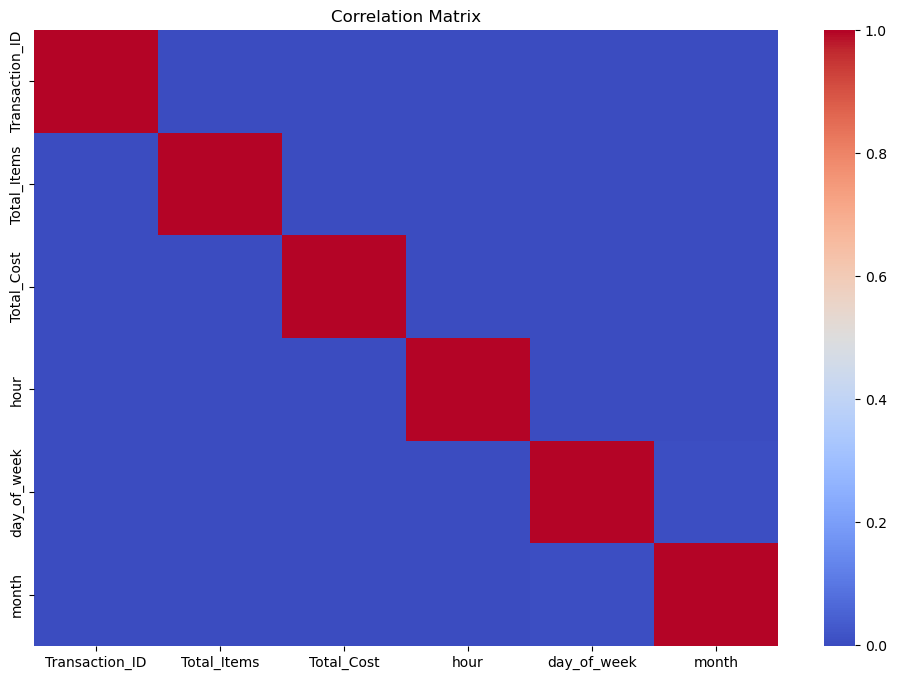

In [7]:
# Drop non-numeric columns
numeric_columns = data_encoded.select_dtypes(include=[np.number]) # this command uses the numeric columns only.

# Visualize the correlation matrix using only the numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

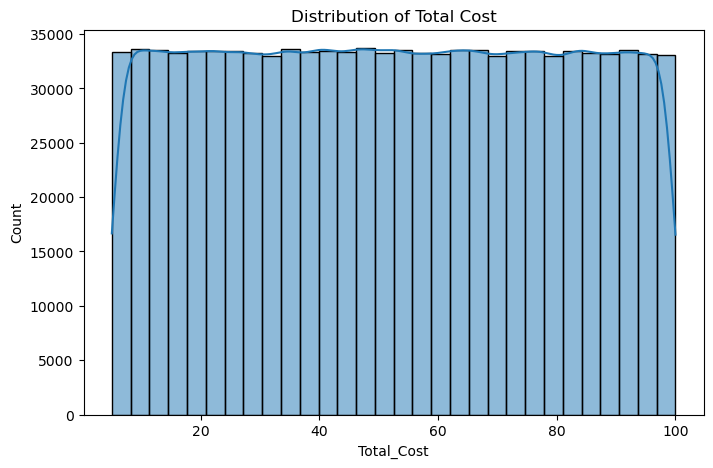

In [8]:
# Visualizing the distribution of 'Total_Cost' using a histogram
plt.figure(figsize=(8, 5))
sns.histplot(data['Total_Cost'], bins=30, kde=True)
plt.title('Distribution of Total Cost')
plt.show()

In [9]:
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_encoded.drop(columns=['Transaction_ID', 'Date', 'Customer_Name', 'Product']))
scaled_features

array([[-0.86916533,  0.70010566,  0.99979202, ..., -0.57676676,
         1.73314616, -0.70716512],
       [-1.21739685, -0.96747435,  0.99979202, ..., -0.57676676,
        -0.57698538, -0.70716512],
       [ 0.17552923, -0.39994274,  0.99979202, ..., -0.57676676,
         1.73314616, -0.70716512],
       ...,
       [-0.86916533,  0.30217701, -1.00020802, ..., -0.57676676,
         1.73314616, -0.70716512],
       [-0.86916533, -1.05683504,  0.99979202, ..., -0.57676676,
         1.73314616, -0.70716512],
       [ 0.87199227, -0.30401677, -1.00020802, ..., -0.57676676,
        -0.57698538,  1.4140969 ]])

In [10]:
# Clustering using KMeans
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

In [11]:
# Step 6: Applying KMeans Clustering
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data_encoded['Cluster'] = kmeans.fit_predict(scaled_features)
data_encoded

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Discount_Applied,hour,day_of_week,month,...,Customer_Category_Retiree,Customer_Category_Senior Citizen,Customer_Category_Student,Customer_Category_Teenager,Customer_Category_Young Adult,Season_Spring,Season_Summer,Season_Winter,Promotion_Discount on Selected Items,Cluster
0,1000000000,2022-01-21 06:27:00,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,True,6,4,1,...,False,False,False,False,False,False,False,True,False,1
1,1000000001,2023-03-01 13:01:00,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,True,13,2,3,...,False,False,False,False,False,False,False,False,False,2
2,1000000002,2024-03-21 15:37:00,Lisa Graves,['Spinach'],6,41.49,True,15,3,3,...,False,False,False,False,False,False,False,True,False,1
3,1000000003,2020-10-31 09:59:00,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,True,9,5,10,...,False,False,False,False,False,True,False,False,False,1
4,1000000004,2020-12-10 00:59:00,Susan Mitchell,['Dish Soap'],10,16.42,False,0,3,12,...,False,False,False,False,True,False,False,True,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1000999995,2023-03-27 06:12:00,Lisa Gonzalez,"['Pickles', 'Carrots', 'Peanut Butter', 'Spong...",1,22.07,False,6,0,3,...,False,False,False,False,False,False,False,True,False,1
999996,1000999996,2022-05-19 05:13:00,Emily Graham,['Cereal'],8,80.25,True,5,3,5,...,False,True,False,False,False,True,False,False,True,2
999997,1000999997,2021-09-03 13:59:00,Cynthia Anderson,['Trash Bags'],3,60.74,False,13,4,9,...,False,False,False,False,False,False,False,True,False,1
999998,1000999998,2023-10-17 05:50:00,Michael Rodriguez,"['Diapers', 'Coffee', 'Coffee', 'Mop']",3,23.48,True,5,1,10,...,True,False,False,False,False,False,False,True,False,0


In [12]:
# Analyzing the Clusters
cluster_analysis = data_encoded['Cluster'].mean()
cluster_analysis

1.461638

In [ ]:
# Visualizing the Cluster Distributions
sns.pairplot(data_encoded, hue='Cluster', vars=['Total_Items', 'Total_Cost', 'Discount_Applied'])
plt.show()